In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Loading train data

In [249]:
train_data=pd.read_csv('/content/train_data.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loading test dta

In [250]:
test_data=pd.read_csv('/content/test_data.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [251]:
train_original = train_data.copy()
test_original = test_data.copy()

Pre-Processing train data and test data

In [252]:
#train data description
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [253]:
#train data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [254]:
# check for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [257]:
# replace missing values with the mode
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [256]:
# replace missing value with the mode
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [258]:
# replace missing values with the median value due to outliers
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [259]:
# check whether all the missing values are filled in the Train dataset
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [260]:
# replace missing values in Test set with mode/median from Training set
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [261]:
# check whether all the missing values are filled in the Test dataset
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

 Outlier Treatment

Text(0.5, 1.0, 'Test')

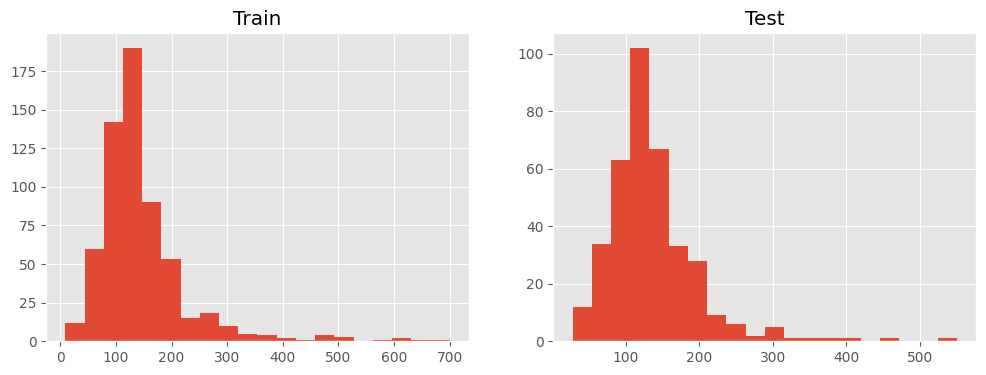

In [262]:
# before log transformation

ax1 = plt.subplot(121)
train_data['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test_data['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [263]:
# Removing skewness in LoanAmount variable by log transformation
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

Text(0.5, 1.0, 'Test')

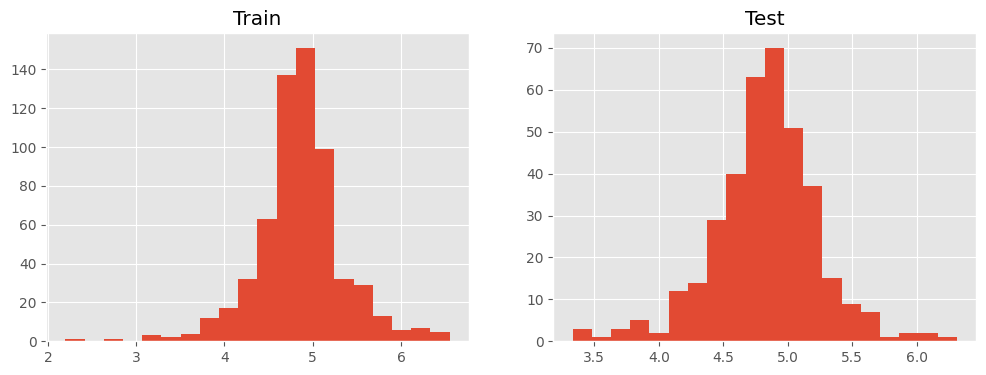

In [264]:
# after log transformation

ax1 = plt.subplot(121)
train_data['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test_data['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")


Model Building : Part I

In [265]:
# drop Loan_ID
train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

In [266]:
# drop "Loan_Status" and assign it to target variable
X = train_data.drop('Loan_Status', 1)
y = train_data.Loan_Status

<ipython-input-266-1e9a73a8c2b2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data.drop('Loan_Status', 1)


In [267]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [268]:
X.shape, train_data.shape, test_data.shape

((614, 21), (614, 23), (367, 21))

In [269]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [270]:
X.shape

(614, 21)

In [271]:
# import library
from sklearn.model_selection import train_test_split

In [272]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [273]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [274]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [275]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [276]:
# make prediction
pred_cv = model.predict(x_cv)

In [ ]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

[[ 23  28]
 [  4 130]]


Text(50.722222222222214, 0.5, 'True')

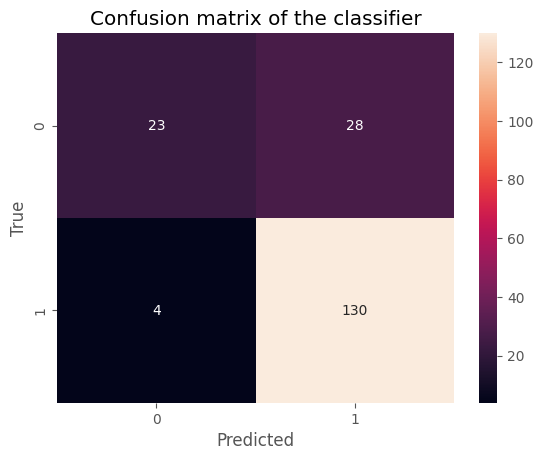

In [278]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [279]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           N       0.85      0.45      0.59        51
           Y       0.82      0.97      0.89       134

    accuracy                           0.83       185
   macro avg       0.84      0.71      0.74       185
weighted avg       0.83      0.83      0.81       185



In [280]:
print("Accuracy score is : ",accuracy_score(y_cv, pred_cv))

Accuracy score is :  0.827027027027027


In [281]:
# make prediction on test set
pred_test = model.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- EMI
- Total_Income
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term


In [282]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [224]:
submission_data = pd.read_csv('/content/Submission_data.csv')

In [225]:
# fill the Loan_ID and Loan_Status
submission_data['Loan_Status'] = pred_test
submission_data['Loan_ID'] = test_original['Loan_ID']

In [226]:
# replace with "N" and "Y"
submission_data['Loan_Status'].replace(0, 'N', inplace=True)
submission_data['Loan_Status'].replace(1, 'Y', inplace=True)

In [227]:
# take a look at the submission result
submission_data.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [228]:
# convert to CSV file, without row index
submission_data.to_csv('logistic.csv', index=False)